In [1]:
#用代数法估计w和b的值
x = [0, 1, 2, 3, 4, 5]
y = [2.9, 4.7, 8.2, 11.9, 15.6, 17.3]

n = len(x)
sum_x = sum(x)
sum_y = sum(y)
avg_x = sum_x / n
sum_xy = sum([x[i]*y[i] for i in range(n)])
sum_xy1 = sum([avg_x*y[i] for i in range(n)])
sum_x2 = sum([x[i]**2 for i in range(n)])

w = (sum_xy-avg_x*sum_y) / (sum_x2 - n*avg_x**2)
b = (sum_y - w*sum_x) / n

print("w =", w)
print("b =", b)

w = 3.0971428571428565
b = 2.3571428571428577


最小二乘估计：
w =  3.0971428571428574
b =  2.357142857142856
学习率为 0.1 时的结果：
w =  3.097142857142894
b =  2.357142857142727


C:\Users\刘明轩\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\刘明轩\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\刘明轩\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\刘明轩\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\刘明轩\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\c

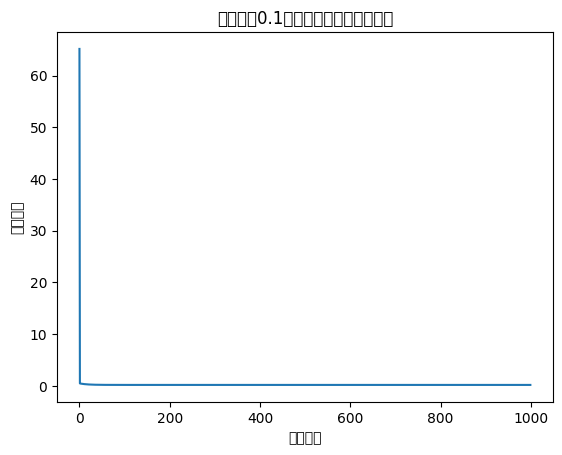

学习率为 0.01 时的结果：
w =  3.117242101068646
b =  2.285821139163745


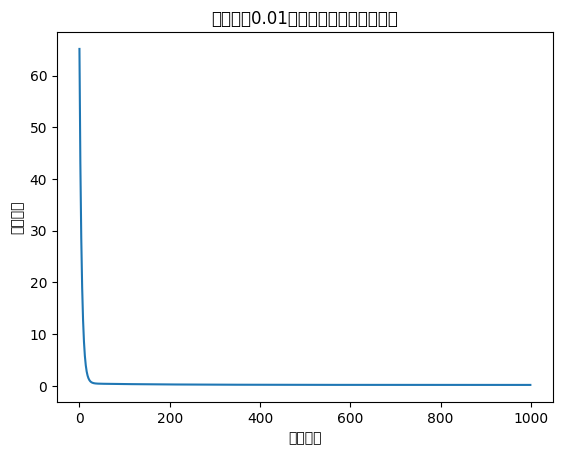

学习率为 0.001 时的结果：
w =  3.3853474906077716
b =  1.3337988757424941


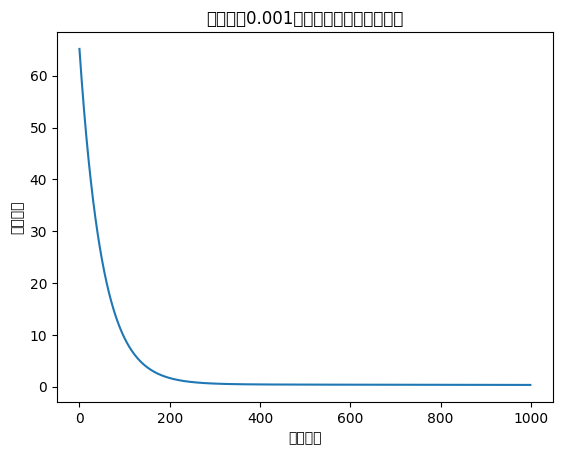

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 样本集合
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([2.9, 4.7, 8.2, 11.9, 15.6, 17.3])

# 最小二乘估计
w = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)
b = np.mean(y) - w * np.mean(x)

# 输出结果
print("最小二乘估计：")
print("w = ", w)
print("b = ", b)

# 设置学习率
learning_rates = [0.1, 0.01, 0.001]

# 迭代次数
num_iterations = 1000

# 梯度下降法更新w和b
for lr in learning_rates:
    w = 0
    b = 0
    losses = []
    for i in range(num_iterations):
        y_pred = w * x + b
        dw = (1 / len(x)) * np.dot(y_pred - y, x)
        db = (1 / len(x)) * np.sum(y_pred - y)
        w = w - lr * dw
        b = b - lr * db
        # 计算损失函数
        loss = (1 / (2 * len(x))) * np.sum((y_pred - y) ** 2)
        losses.append(loss)
        # 当误差小于10e-3时停止迭代
        if loss < 10e-3:
            break
    # 输出结果
    print("学习率为", lr, "时的结果：")
    print("w = ", w)
    print("b = ", b)
    # 绘制损失函数变化趋势图
    plt.plot(losses)
    plt.xlabel("迭代次数")
    plt.ylabel("损失函数")
    plt.title("学习率为" + str(lr) + "时的损失函数变化趋势图")
    plt.show()